In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# 1. Load the Data
# ==========================================
df = pd.read_csv("../data/processed/womens_fitness_realistic.csv")

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (1964, 21)


,id,exercise,calories_burn,dream_weight,actual_weight,age,gender,duration,heart_rate,bmi,...,exercise_intensity,calories_per_min,weight_diff,Cycle_Day,Cycle_Phase,Estrogen_Level,Progesterone_Level,Fatigue_Level,Recommended_Intensity,Adjusted_Calories
0,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,...,3,12.24,4.32,7,Follicular,99.630163,1.519508,0.331315,High,457.950211
1,6,Exercise 1,479.722690,78.887578,80.596592,60,Female,41,169,34.719336,...,10,11.70,-1.71,20,Luteal,208.513017,17.438136,0.583026,Moderate,503.708825
2,12,Exercise 1,376.552649,95.196283,97.368961,35,Female,28,158,34.565117,...,6,13.45,-2.17,15,Ovulatory,216.209243,2.880733,0.267451,High,433.035547
3,13,Exercise 1,311.106024,83.679152,84.428659,54,Female,48,173,34.522637,...,4,6.48,-0.75,11,Follicular,149.321402,1.152262,0.304101,High,342.216626
4,17,Exercise 2,216.866393,84.638075,88.314527,38,Female,46,119,33.678882,...,7,4.71,-3.68,8,Follicular,176.193106,1.990293,0.479860,Moderate,238.553033


In [5]:
# 2. Encode and Prepare Data
# ==========================================
label_cols = ['Cycle_Phase', 'Recommended_Intensity']

encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

# Select useful features
X = df[['Cycle_Phase', 'Estrogen_Level', 'Progesterone_Level', 
        'Fatigue_Level', 'heart_rate', 'bmi', 'duration']]
y = df['Recommended_Intensity']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 3. Train a Random Forest Classifier
# ==========================================
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       176

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



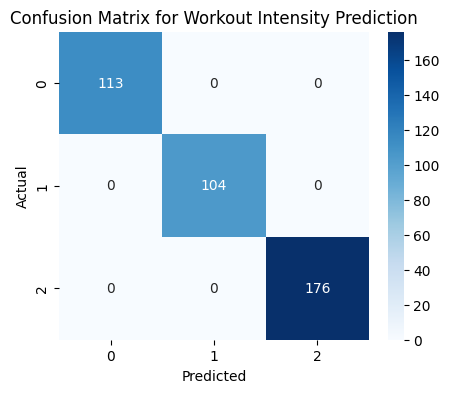

In [7]:
# 4. Evaluate Performance
# ==========================================
y_pred = model.predict(X_test_scaled)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Workout Intensity Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

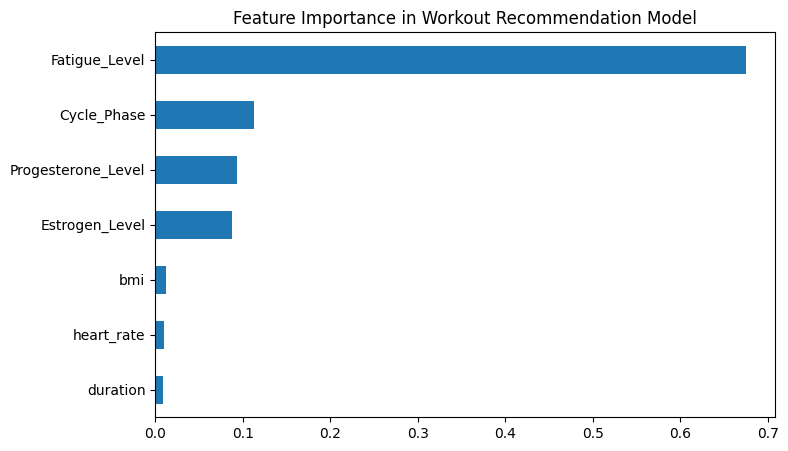

In [8]:
# 5. Feature Importance
# ==========================================
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance in Workout Recommendation Model")
plt.show()

In [9]:
# 6. Test with Example Scenarios
# ==========================================
example_data = pd.DataFrame({
    'Cycle_Phase': [0, 1, 2, 3],  # Menstrual, Follicular, Ovulatory, Luteal
    'Estrogen_Level': [30, 70, 90, 40],
    'Progesterone_Level': [10, 20, 30, 80],
    'Fatigue_Level': [0.8, 0.3, 0.2, 0.6],
    'heart_rate': [130, 150, 160, 140],
    'bmi': [24, 22, 23, 25],
    'duration': [30, 40, 45, 35]
})

example_scaled = scaler.transform(example_data)
preds = model.predict(example_scaled)

# Decode back to labels
decoded_preds = encoder.inverse_transform(preds)
example_data['Predicted_Recommended_Intensity'] = decoded_preds
print("\n--- Example Recommendations ---")
display(example_data)


--- Example Recommendations ---


,Cycle_Phase,Estrogen_Level,Progesterone_Level,Fatigue_Level,heart_rate,bmi,duration,Predicted_Recommended_Intensity
0,0,30,10,0.8,130,24,30,1
1,1,70,20,0.3,150,22,40,2
2,2,90,30,0.2,160,23,45,2
3,3,40,80,0.6,140,25,35,2


In [11]:
# 7. Save the Trained Model
# ==========================================
import joblib
joblib.dump(model, "../models/workout_recommendation_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

print("\nModel and scaler saved successfully!")



Model and scaler saved successfully!
